The aim of this exercise is to build a classification model that can classify the text message either as Ham or Spam i.e
Model to predict message type.  

The key difference between the unstructure and structured with Keras is the **Preprocessing Needed** to prepare data.   
**Text Preprocessing**  
    1. Cleaning  
    2. Stop word removal  
    3. Lemmatization  
    4. Numeric representation e.g use TF-IDF vs word embeddings

In [1]:
!pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wabo914\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wabo914\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wabo914\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Creating Text Representations
Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [3]:
#Load Spam Data and review content
spam_data = pd.read_csv("Spam-Classification.csv")

print("\nLoaded Data :\n-------------------")
print(spam_data.head())


Loaded Data :
-------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [4]:
#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

Preprocessing by creating a custom tokenizer function

In [6]:
import nltk
import tensorflow as tf


### We can use below if we get the error ' customtokenize' not defined
def customtokenize(text):
    # Split the text into tokens based on space as a delimiter
    tokens = text.split()
    return tokens



#Custom tokenizer to remove stopwords and use lemmatization
def customtokenizer(str):
    #Split strings as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop=list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]


from sklearn.feature_extraction.text import TfidfVectorizer

#build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)



Transform feature input to TF-IDF

In [7]:
#Transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages)
#convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build  a label encoder for target variable to convert strings to numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
spam_classes_raw)


#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape: ", spam_classes.shape)

X_train, X_test, Y_train, Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

C:\Users\Wabo914\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape :  (1500, 6221)
One-hot Encoding Shape:  (1500, 2)


### Buiding and Evaluating the Model

In [8]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Set Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32

model= tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN, 
                             input_shape=(X_train.shape[1],),
                             name='Hidden_layer-1',
                             activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                            name='Hidden_layer-2',
                            activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                            name= 'Output-Layer',
                            activation='Softmax'))

model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer-1 (Dense)      (None, 32)                199104    
                                                                 
 Hidden_layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 200226 (782.13 KB)
Trainable params: 200226 (782.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Perform Training


Training Progress:
------------------
Epoch 1/20
5/5 [==============================] - 1s 74ms/step - loss: 0.6878 - accuracy: 0.5944 - val_loss: 0.6743 - val_accuracy: 0.8111
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.6569 - accuracy: 0.8750 - val_loss: 0.6433 - val_accuracy: 0.9148
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.6123 - accuracy: 0.9685 - val_loss: 0.6059 - val_accuracy: 0.9148
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5589 - accuracy: 0.9815 - val_loss: 0.5630 - val_accuracy: 0.9370
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.5026 - accuracy: 0.9824 - val_loss: 0.5197 - val_accuracy: 0.9444
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.4452 - accuracy: 0.9870 - val_loss: 0.4778 - val_accuracy: 0.9407
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3903 - accuracy: 0.9907 - val_loss: 0.4370 - val_accur

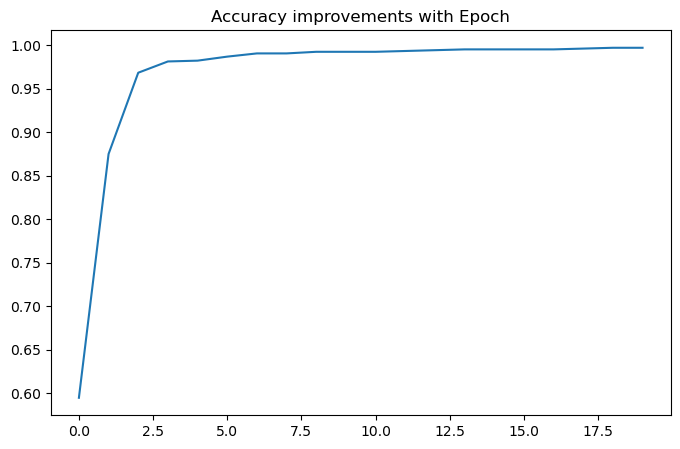


Evaluation against Test Dataset :n--------------
5/5 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9200


[0.1902134269475937, 0.9200000166893005]

In [9]:
#Make it verbose so we can see the progress
VERBOSE = 1

#Setup Hyper Parameters for training
BATCH_SIZE = 256
EPOCHS = 20
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n------------------")

history=model.fit(X_train,
                 Y_train,
                 batch_size = BATCH_SIZE,
                 epochs=EPOCHS,
                 verbose=VERBOSE,
                 validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n----------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :n--------------")
model.evaluate(X_test, Y_test)

## Predicting for Text

In [10]:
#Predictfor multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf = vectorizer.transform(["FREE entry to a fun contest", 
                                     "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

#predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1)
print("Prediction Output: ", prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 6221)
1/1 [==============================] - 0s 83ms/step
Prediction Output:  [1 0]
Prediction Classes are  ['spam' 'ham']
